# Imports

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Observation des données

In [2]:
app_test = pd.read_csv("application_test.csv", sep = ",", low_memory=False)
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
app_train = pd.read_csv("application_train.csv", sep = ",", low_memory=False)
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
bureau = pd.read_csv("bureau.csv", sep = ",", low_memory=False)
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [5]:
bureau_balance = pd.read_csv("bureau_balance.csv", sep = ",", low_memory=False)
bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [6]:
previous_applications = pd.read_csv("previous_application.csv", sep = ",", low_memory=False)
previous_applications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [7]:
POS_CASH = pd.read_csv("POS_CASH_balance.csv", sep = ",", low_memory=False)
POS_CASH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [8]:
credit_card = pd.read_csv("credit_card_balance.csv", sep = ",", low_memory=False)
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [9]:
installments = pd.read_csv("installments_payments.csv", sep = ",", low_memory=False)
installments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


# Analyse exploratoire

## Distribution de la target

In [10]:
app_train['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

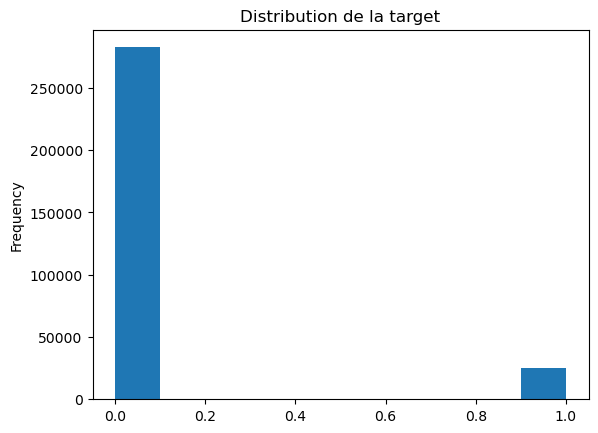

In [11]:
app_train['TARGET'].plot.hist()
plt.title("Distribution de la target")
plt.show()

## Valeurs manquantes

In [12]:
mis_val = app_train.isnull().sum()
mis_val_percent = mis_val / len(app_train) * 100
mis_val_percent.sort_values()

SK_ID_CURR                      0.000000
HOUR_APPR_PROCESS_START         0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
                                 ...    
NONLIVINGAPARTMENTS_MEDI       69.432963
NONLIVINGAPARTMENTS_MODE       69.432963
COMMONAREA_MODE                69.872297
COMMONAREA_AVG                 69.872297
COMMONAREA_MEDI                69.872297
Length: 122, dtype: float64

In [13]:
def missing_values_table(df):
    """
    Takes a dataframe, and returns :
    - the amount of columns with missing values
    - a table with, for each row, shows how many (flat and percentage) missing values there are
    """
    # Total missing values
    miss_val = df.isnull().sum()
    
    # Same, but percentage wise
    miss_val_percentage = (miss_val / len(df) * 100).round(1)
    
    # Creating table
    miss_val_table = pd.concat([miss_val, miss_val_percentage], axis = 1)
    
    # Renaming columns
    miss_val_table = miss_val_table.rename(columns = {
        0 : 'Missing Values',
        1 : '% of Total Values'
    })
    
    # Sorting by most missing values
    miss_val_table_sorted = miss_val_table.sort_values('Missing Values', ascending = False)
    
    # Printing amount of columns with missing values
    amount_of_columns = miss_val_table[miss_val_table.iloc[:,0] != 0].shape[0]
    print("This dataframe has", df.shape[1], "columns. \n"
         "There are", amount_of_columns, "columns with missing values.")
    
    # Returning the table
    return miss_val_table_sorted

missing_values = missing_values_table(app_train)
missing_values.head(20)

This dataframe has 122 columns. 
There are 67 columns with missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
NONLIVINGAPARTMENTS_MEDI,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4


## Features catégorielles

In [14]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

In [15]:
app_train.select_dtypes("object").apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [16]:
le = LabelEncoder()
le_count = 0

# Je parcours mes colonnes et je teste si 1. elles sont de type object et 2. elles ont 2 catégories
for col in app_train:
    if app_train[col].dtype == "object":
        if len(list(app_train[col].unique())) <= 2:
            # Dans ce cas, j'utilise le LabelEncoder
            app_train[col] = le.fit_transform(app_train[col])
            
            le_count += 1

print(le_count, "colonnes encodées avec LabelEncoder")

3 colonnes encodées avec LabelEncoder


In [17]:
app_train = pd.get_dummies(app_train)
print("Nouvelle taille de app_train :", app_train.shape)

Nouvelle taille de app_train : (307511, 243)


In [18]:
app_train.dtypes.value_counts()

bool       134
float64     65
int64       41
int32        3
Name: count, dtype: int64

## Outliers

In [19]:
app_train.describe()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.095213,0.340108,0.693673,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.293509,0.473746,0.460968,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,0.000000,1.000000,1.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,1.000000,1.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [20]:
(app_train["DAYS_BIRTH"] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [21]:
(app_train["DAYS_EMPLOYED"] / -365).describe()

count    307511.000000
mean       -174.835742
std         387.056895
min       -1000.665753
25%           0.791781
50%           3.323288
75%           7.561644
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64

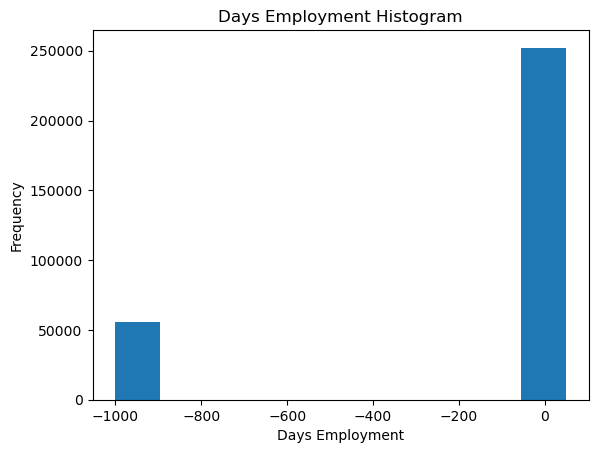

In [22]:
(app_train['DAYS_EMPLOYED'] / -365).plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment')
plt.show()

In [23]:
app_train['DAYS_EMPLOYED'].value_counts()

DAYS_EMPLOYED
 365243    55374
-200         156
-224         152
-230         151
-199         151
           ...  
-13961         1
-11827         1
-10176         1
-9459          1
-8694          1
Name: count, Length: 12574, dtype: int64

In [24]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('Les clients présentant l\'anomalie font défaut sur %0.2f%% des prêts' % (100 * non_anom['TARGET'].mean()))
print("Les clients présentant l'anomalie font défaut sur %0.2f%% des prêts" % (100 * anom['TARGET'].mean()))

Les clients présentant l'anomalie font défaut sur 8.66% des prêts
Les clients présentant l'anomalie font défaut sur 5.40% des prêts


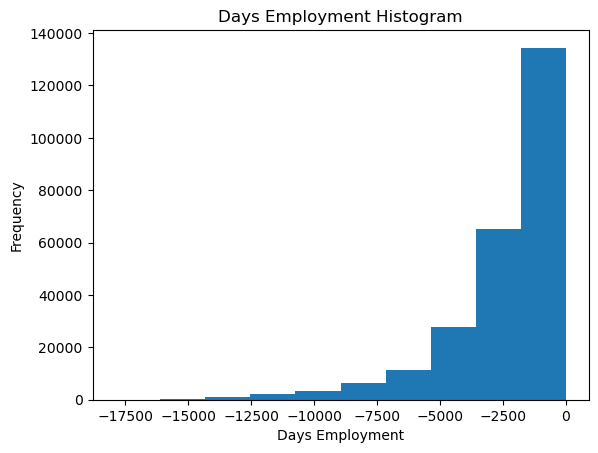

In [25]:
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED_ANOM'] = le.fit_transform(app_train['DAYS_EMPLOYED_ANOM'])

# On supprime l'anomalie
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram')
plt.xlabel('Days Employment')
plt.show()

In [26]:
app_train['DAYS_EMPLOYED_ANOM']

0         0
1         0
2         0
3         0
4         0
         ..
307506    0
307507    1
307508    0
307509    0
307510    0
Name: DAYS_EMPLOYED_ANOM, Length: 307511, dtype: int64

In [27]:
app_train['DAYS_EMPLOYED_ANOM'].describe()

count    307511.000000
mean          0.180072
std           0.384248
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: DAYS_EMPLOYED_ANOM, dtype: float64

## Corrélations

In [28]:
correlations = app_train.corr()['TARGET'].sort_values()
print('Plus fortes corrélations positives:\n', correlations.tail(15))
print('\nPlus fortes corrélations négatives:\n', correlations.head(15))

Plus fortes corrélations positives:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Plu

In [29]:
abs(correlations).sort_values(ascending = False).head(10)

TARGET                                  1.000000
EXT_SOURCE_3                            0.178919
EXT_SOURCE_2                            0.160472
EXT_SOURCE_1                            0.155317
DAYS_BIRTH                              0.078239
DAYS_EMPLOYED                           0.074958
REGION_RATING_CLIENT_W_CITY             0.060893
REGION_RATING_CLIENT                    0.058899
NAME_INCOME_TYPE_Working                0.057481
NAME_EDUCATION_TYPE_Higher education    0.056593
Name: TARGET, dtype: float64

### Days of birth

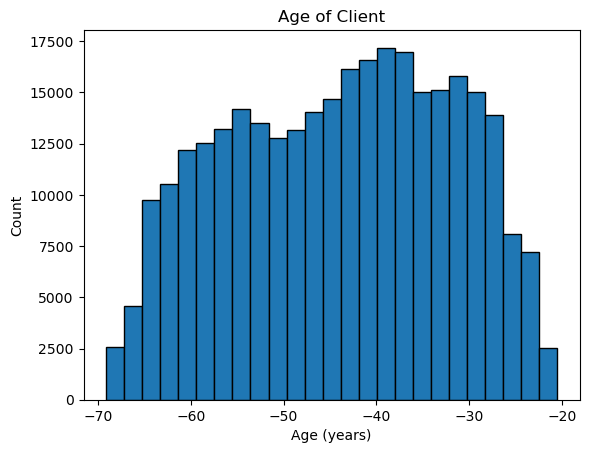

In [30]:
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

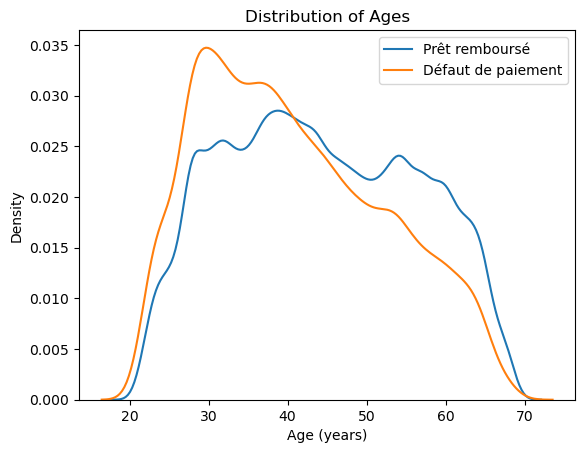

In [31]:
app_train['DAYS_BIRTH'] = -app_train['DAYS_BIRTH']

# KDE plot pour les prêts remboursés
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'Prêt remboursé')

# KDE plot pour les défauts de paiement
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'Défaut de paiement')

# légendes
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Distribution of Ages')
plt.legend()
plt.show()

In [32]:
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# On sépare en classes de 5 ans d'amplitude
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

C:\Users\ludov\AppData\Local\Temp\ipykernel_23324\2567227267.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365
C:\Users\ludov\AppData\Local\Temp\ipykernel_23324\2567227267.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [33]:
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


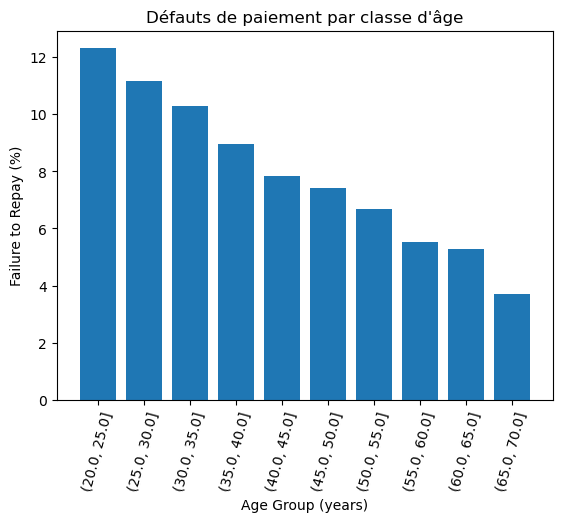

In [34]:
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

plt.xticks(rotation = 75)
plt.xlabel('Age Group (years)')
plt.ylabel('Failure to Repay (%)')
plt.title('Défauts de paiement par classe d\'âge')
plt.show()

### Ext sources

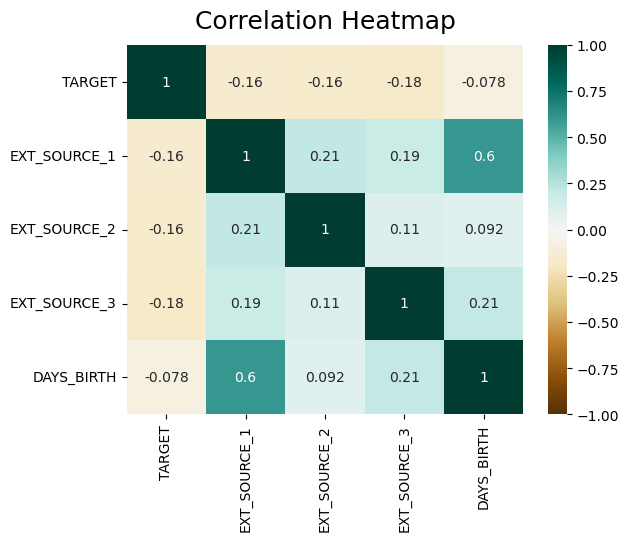

In [35]:
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
heatmap = sns.heatmap(ext_data_corrs, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
plt.show()

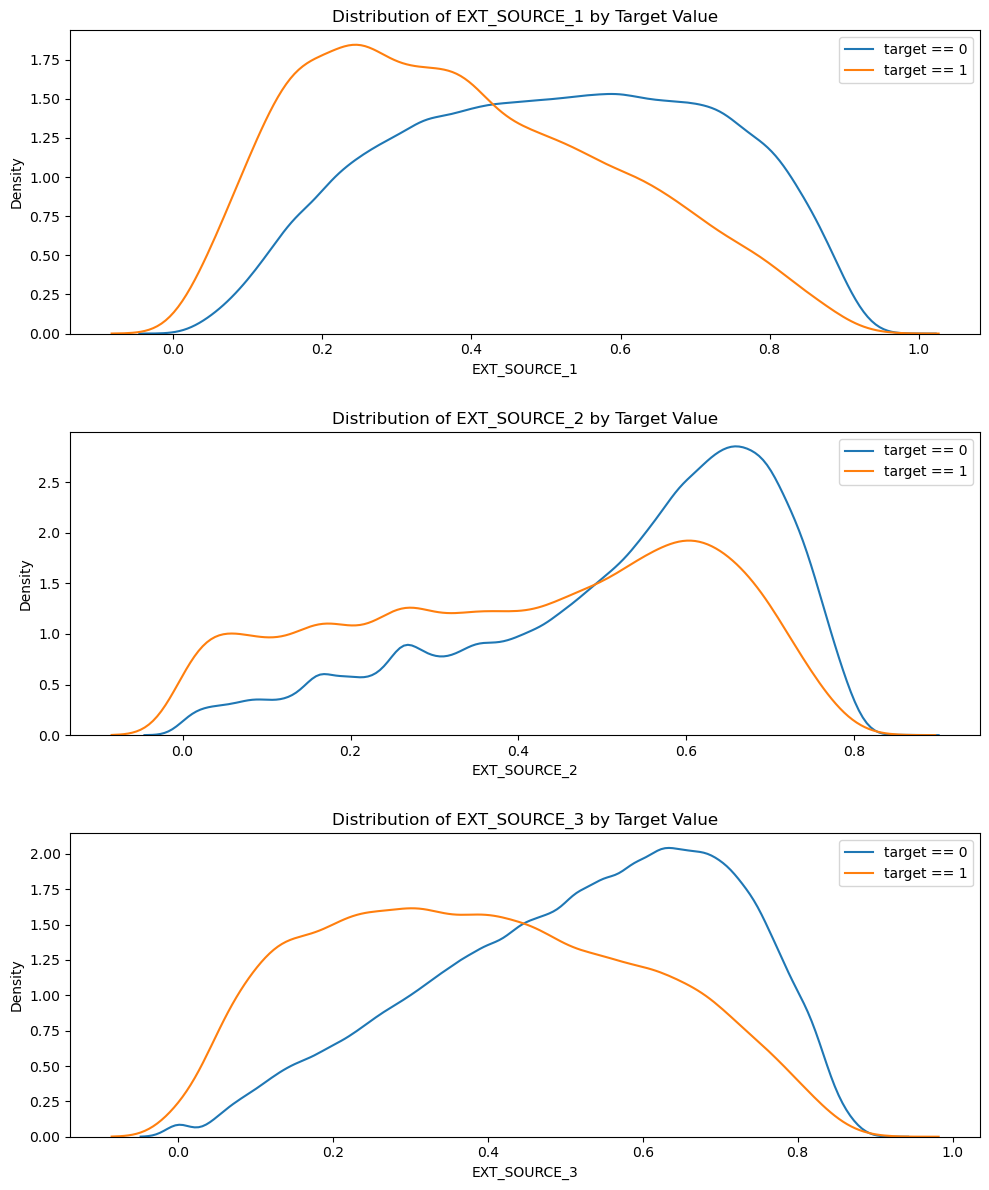

In [36]:
plt.figure(figsize = (10, 12))

for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source)
    plt.ylabel('Density')
    plt.legend()
    
plt.tight_layout(h_pad = 2.5)

# Liens avec les autres csv, feature engineering

In [37]:
bureau.shape

(1716428, 17)

In [38]:
bureau["SK_ID_CURR"].unique().shape

(305811,)

In [39]:
bureau_balance["SK_ID_BUREAU"].unique().shape

(817395,)

In [40]:
bureau_balance.shape

(27299925, 3)

In [41]:
bureau.dtypes

SK_ID_CURR                  int64
SK_ID_BUREAU                int64
CREDIT_ACTIVE              object
CREDIT_CURRENCY            object
DAYS_CREDIT                 int64
CREDIT_DAY_OVERDUE          int64
DAYS_CREDIT_ENDDATE       float64
DAYS_ENDDATE_FACT         float64
AMT_CREDIT_MAX_OVERDUE    float64
CNT_CREDIT_PROLONG          int64
AMT_CREDIT_SUM            float64
AMT_CREDIT_SUM_DEBT       float64
AMT_CREDIT_SUM_LIMIT      float64
AMT_CREDIT_SUM_OVERDUE    float64
CREDIT_TYPE                object
DAYS_CREDIT_UPDATE          int64
AMT_ANNUITY               float64
dtype: object

## Variables numériques dataframes bureau

In [42]:
def agg_numeric_features(df, group_var, df_name):
    """
    Aggregates the numeric values in a dataframe.
    This can be used to create features for each instance of the grouping variable.
    
    Parameters
    ------
        df (dataframe):
            the dataframe to calculate the statistics on
        group_var (string):
            the variable by which to group df
        df_name (string):
            the name you want at the start of the new variables
            
    Return
    -------
        agg(dataframe):
            a dataframe with the statistics aggregated for all columns.
            Each instance of the grouping variable will have count, mean, min, max and sum calculated.
            The columns are also renamed to keep track of the features created.
    """
    
    # Removing all "ID" variables other than the grouping variable
    for col in df:
        if col != group_var and 'SK_ID' in col:
            df = df.drop(columns = col)
            
    # Restricting to only numerical variables
    group_ids = df[group_var]
    numeric_df = df.select_dtypes('number')
    numeric_df[group_var] = group_ids
    
    # Group by our group_var and calculate the mean, min, max, count and sum
    agg = numeric_df.groupby(group_var).agg(['count','mean','max','min','sum']).reset_index()
    
    # Now we only need to rename our columns
    columns = [group_var]
    for var in agg.columns.levels[0]:
        if var != group_var:
            for stat in agg.columns.levels[1][:-1]:
                columns.append('%s_%s_%s' % (df_name, var, stat))
    
    agg.columns = columns
    return agg

bureau_agg_with_function = agg_numeric_features(bureau, group_var = 'SK_ID_CURR', df_name = 'bureau')
bureau_agg_with_function.head()

,SK_ID_CURR,bureau_DAYS_CREDIT_count,bureau_DAYS_CREDIT_mean,bureau_DAYS_CREDIT_max,bureau_DAYS_CREDIT_min,bureau_DAYS_CREDIT_sum,bureau_CREDIT_DAY_OVERDUE_count,bureau_CREDIT_DAY_OVERDUE_mean,bureau_CREDIT_DAY_OVERDUE_max,bureau_CREDIT_DAY_OVERDUE_min,...,bureau_DAYS_CREDIT_UPDATE_count,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_max,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_sum,bureau_AMT_ANNUITY_count,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_sum
0,100001,7,-735.000000,-49,-1572,-5145,7,0.0,0,0,...,7,-93.142857,-6,-155,-652,7,3545.357143,10822.5,0.0,24817.5
1,100002,8,-874.000000,-103,-1437,-6992,8,0.0,0,0,...,8,-499.875000,-7,-1185,-3999,7,0.000000,0.0,0.0,0.0
2,100003,4,-1400.750000,-606,-2586,-5603,4,0.0,0,0,...,4,-816.000000,-43,-2131,-3264,0,NaN,NaN,NaN,0.0
3,100004,2,-867.000000,-408,-1326,-1734,2,0.0,0,0,...,2,-532.000000,-382,-682,-1064,0,NaN,NaN,NaN,0.0
4,100005,3,-190.666667,-62,-373,-572,3,0.0,0,0,...,3,-54.333333,-11,-121,-163,3,1420.500000,4261.5,0.0,4261.5


In [43]:
def most_correlated_features(df, amount):
    """
    Calculates the correlation coefficients between all the features and TARGET.
    
    Parameters
    ------
        df(dataframe) : the dataframe to be used
        amount(int)   : the amount of variables you want to see
    
    Return
    ------
        the list of the top "amount" best variables correlation-wise, with the associated
        correlation coefficients.
    """
    correlations = df.corr()['TARGET'].sort_values()
    return abs(correlations).sort_values(ascending = False).head(amount)

most_correlated_features(app_train, 20)

TARGET                                               1.000000
EXT_SOURCE_3                                         0.178919
EXT_SOURCE_2                                         0.160472
EXT_SOURCE_1                                         0.155317
DAYS_BIRTH                                           0.078239
DAYS_EMPLOYED                                        0.074958
REGION_RATING_CLIENT_W_CITY                          0.060893
REGION_RATING_CLIENT                                 0.058899
NAME_INCOME_TYPE_Working                             0.057481
NAME_EDUCATION_TYPE_Higher education                 0.056593
DAYS_LAST_PHONE_CHANGE                               0.055218
CODE_GENDER_M                                        0.054713
CODE_GENDER_F                                        0.054704
DAYS_ID_PUBLISH                                      0.051457
REG_CITY_NOT_WORK_CITY                               0.050994
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
NAME_INC

## Variables catégorielles dataframes bureau

In [44]:
bureau_categ = bureau.select_dtypes('object')
bureau_categ["SK_ID_CURR"] = bureau["SK_ID_CURR"]
bureau_categ.head(10)

,CREDIT_ACTIVE,CREDIT_CURRENCY,CREDIT_TYPE,SK_ID_CURR
0,Closed,currency 1,Consumer credit,215354
1,Active,currency 1,Credit card,215354
2,Active,currency 1,Consumer credit,215354
3,Active,currency 1,Credit card,215354
4,Active,currency 1,Consumer credit,215354
5,Active,currency 1,Credit card,215354
6,Active,currency 1,Consumer credit,215354
7,Closed,currency 1,Consumer credit,162297
8,Closed,currency 1,Consumer credit,162297
9,Active,currency 1,Credit card,162297


In [45]:
categorical = pd.get_dummies(bureau.select_dtypes('object'))
categorical["SK_ID_CURR"] = bureau["SK_ID_CURR"]
categorical.head(10)

,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_CURRENCY_currency 1,CREDIT_CURRENCY_currency 2,CREDIT_CURRENCY_currency 3,CREDIT_CURRENCY_currency 4,CREDIT_TYPE_Another type of loan,CREDIT_TYPE_Car loan,...,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan,SK_ID_CURR
0,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,215354
1,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,215354
2,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,215354
3,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,215354
4,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,215354
5,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,215354
6,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,215354
7,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,162297
8,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,162297
9,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,162297


In [46]:
categorical_grouped = categorical.groupby('SK_ID_CURR').agg(['sum','mean']).reset_index()
categorical_grouped.head()

SK_ID_CURR CREDIT_ACTIVE_Active           CREDIT_ACTIVE_Bad debt       \
                              sum      mean                    sum mean   
0     100001                    3  0.428571                      0  0.0   
1     100002                    2  0.250000                      0  0.0   
2     100003                    1  0.250000                      0  0.0   
3     100004                    0  0.000000                      0  0.0   
4     100005                    2  0.666667                      0  0.0   

  CREDIT_ACTIVE_Closed           CREDIT_ACTIVE_Sold       \
                   sum      mean                sum mean   
0                    4  0.571429                  0  0.0   
1                    6  0.750000                  0  0.0   
2                    3  0.750000                  0  0.0   
3                    2  1.000000                  0  0.0   
4                    1  0.333333                  0  0.0   

  CREDIT_CURRENCY_currency 1  ... CREDIT_TYPE_Microloan       \
                         sum  ...                   sum mean   
0                          7  ...                     0  0.0   
1                          8  ...                     0  0.0   
2                          4  ...                     0  0.0   
3                          2  ...                     0  0.0   
4                          3  ...                     0  0.0   

  CREDIT_TYPE_Mobile operator loan      CREDIT_TYPE_Mortgage       \
                               sum mean                  sum mean   
0                                0  0.0                    0  0.0   
1                                0  0.0                    0  0.0   
2                                0  0.0                    0  0.0   
3                                0  0.0                    0  0.0   
4                                0  0.0                    0  0.0   

  CREDIT_TYPE_Real estate loan      CREDIT_TYPE_Unknown type of loan       
                           sum mean                              sum mean  
0                            0  0.0                                0  0.0  
1                            0  0.0                                0  0.0  
2                            0  0.0                                0  0.0  
3                            0  0.0                                0  0.0  
4                            0  0.0                                0  0.0  

[5 rows x 47 columns]

In [47]:
columns = ["SK_ID_CURR"]

for var in categorical_grouped.columns.levels[0]:
    if var != "SK_ID_CURR":
        for stat in ['count','freq']:
            columns.append('%s_%s' % (var,stat))
            
categorical_grouped.columns = columns

categorical_grouped.head()

,SK_ID_CURR,CREDIT_ACTIVE_Active_count,CREDIT_ACTIVE_Active_freq,CREDIT_ACTIVE_Bad debt_count,CREDIT_ACTIVE_Bad debt_freq,CREDIT_ACTIVE_Closed_count,CREDIT_ACTIVE_Closed_freq,CREDIT_ACTIVE_Sold_count,CREDIT_ACTIVE_Sold_freq,CREDIT_CURRENCY_currency 1_count,...,CREDIT_TYPE_Microloan_count,CREDIT_TYPE_Microloan_freq,CREDIT_TYPE_Mobile operator loan_count,CREDIT_TYPE_Mobile operator loan_freq,CREDIT_TYPE_Mortgage_count,CREDIT_TYPE_Mortgage_freq,CREDIT_TYPE_Real estate loan_count,CREDIT_TYPE_Real estate loan_freq,CREDIT_TYPE_Unknown type of loan_count,CREDIT_TYPE_Unknown type of loan_freq
0,100001,3,0.428571,0,0.0,4,0.571429,0,0.0,7,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
1,100002,2,0.250000,0,0.0,6,0.750000,0,0.0,8,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
2,100003,1,0.250000,0,0.0,3,0.750000,0,0.0,4,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
3,100004,0,0.000000,0,0.0,2,1.000000,0,0.0,2,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
4,100005,2,0.666667,0,0.0,1,0.333333,0,0.0,3,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0


In [48]:
def count_categorical(df, group_var, df_name):
    """
    Computes counts and frequencies for each observation of 'group_var' of each unique category
    in every categorical variable of 'df'
    
    Parameters
    -------
    df : dataframe
        the dataframe to calculate the value counts for
        
    group_var : string
        the variable to group the dataframe on
        
    df_name : string
        variable added to the front of column names to keep track of columns
        
    Return
    ------
    categorical_grouped : dataframe
        A dataframe with counts and frequencies for each unique category in every categorical variable.
        Has one row for each unique value of 'group_var'
    """
    # Getting only categorical columns
    categorical = pd.get_dummies(df.select_dtypes('object'))
    
    # Getting group_var back because it's not categorical
    categorical[group_var] = df[group_var]
    
    # Grouping on group_var
    categorical_grouped = categorical.groupby(group_var).agg(['sum','mean']).reset_index()
    
    # As usual now, renaming the columns
    columns = [group_var]

    for var in categorical_grouped.columns.levels[0]:
        if var != group_var:
            for stat in ['count','freq']:
                columns.append('%s_%s_%s' % (df_name,var,stat))
            
    categorical_grouped.columns = columns

    return categorical_grouped

bureau_counts = count_categorical(bureau, group_var = 'SK_ID_CURR', df_name = 'bureau')
bureau_counts.head()

,SK_ID_CURR,bureau_CREDIT_ACTIVE_Active_count,bureau_CREDIT_ACTIVE_Active_freq,bureau_CREDIT_ACTIVE_Bad debt_count,bureau_CREDIT_ACTIVE_Bad debt_freq,bureau_CREDIT_ACTIVE_Closed_count,bureau_CREDIT_ACTIVE_Closed_freq,bureau_CREDIT_ACTIVE_Sold_count,bureau_CREDIT_ACTIVE_Sold_freq,bureau_CREDIT_CURRENCY_currency 1_count,...,bureau_CREDIT_TYPE_Microloan_count,bureau_CREDIT_TYPE_Microloan_freq,bureau_CREDIT_TYPE_Mobile operator loan_count,bureau_CREDIT_TYPE_Mobile operator loan_freq,bureau_CREDIT_TYPE_Mortgage_count,bureau_CREDIT_TYPE_Mortgage_freq,bureau_CREDIT_TYPE_Real estate loan_count,bureau_CREDIT_TYPE_Real estate loan_freq,bureau_CREDIT_TYPE_Unknown type of loan_count,bureau_CREDIT_TYPE_Unknown type of loan_freq
0,100001,3,0.428571,0,0.0,4,0.571429,0,0.0,7,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
1,100002,2,0.250000,0,0.0,6,0.750000,0,0.0,8,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
2,100003,1,0.250000,0,0.0,3,0.750000,0,0.0,4,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
3,100004,0,0.000000,0,0.0,2,1.000000,0,0.0,2,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
4,100005,2,0.666667,0,0.0,1,0.333333,0,0.0,3,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0


In [49]:
def merge_bureaus (df):
    """
    Just a practical function to merge both 'bureau' and 'bureau_balance' to 'df'
    
    Parameters
    ------
    df (dataframe):
        the df (app_train or app_test) to merge on
        
    Return
    ------
    df_merged (dataframe):
        the same dataframe, with all the features from 'bureau' and 'bureau_balance' added
    """
    
    # We work first on bureau_balance (numerical then categorical features)
    bureau_balance_num = agg_numeric_features(bureau_balance, 'SK_ID_BUREAU', 'bureau_balance')
    bureau_balance_cat = count_categorical(bureau_balance, 'SK_ID_BUREAU', 'bureau_balance')
    
    # We merge both of them
    new_bureau_balance = bureau_balance_num.merge(bureau_balance_cat, on = "SK_ID_BUREAU")
    
    # We merge all of this with 'bureau'
    augmented_bureau = bureau.merge(new_bureau_balance, how = 'left', on = 'SK_ID_BUREAU')
    
    # We remove our now useless column
    augmented_bureau.drop(columns = ["SK_ID_BUREAU"], inplace = True)
    
    # Now we repeat all of this with augmented_bureau, SK_ID_CURR instead of bureau_balance and SK_ID_BUREAU
    bureau_num = agg_numeric_features(augmented_bureau, 'SK_ID_CURR', 'bureau')
    bureau_cat = count_categorical(augmented_bureau, 'SK_ID_CURR', 'bureau')
    new_bureau = bureau_num.merge(bureau_cat, on = 'SK_ID_CURR')
    
    # Finally we can merge it all with 'df'
    merged_with_bureau = df.merge(new_bureau, how = 'left', on = 'SK_ID_CURR')
    
    return merged_with_bureau

app_train_with_bureau = merge_bureaus(app_train)
print("A l'origine, app_train possède", app_train.shape[1], "features")
print("Avec les données d'organismes extérieurs, cela donne", app_train_with_bureau.shape[1],"features")

A l'origine, app_train possède 244 features
Avec les données d'organismes extérieurs, cela donne 455 features


In [50]:
app_train_with_bureau.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,bureau_CREDIT_TYPE_Microloan_count,bureau_CREDIT_TYPE_Microloan_freq,bureau_CREDIT_TYPE_Mobile operator loan_count,bureau_CREDIT_TYPE_Mobile operator loan_freq,bureau_CREDIT_TYPE_Mortgage_count,bureau_CREDIT_TYPE_Mortgage_freq,bureau_CREDIT_TYPE_Real estate loan_count,bureau_CREDIT_TYPE_Real estate loan_freq,bureau_CREDIT_TYPE_Unknown type of loan_count,bureau_CREDIT_TYPE_Unknown type of loan_freq
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Bilan provisoire dataframes bureau

In [51]:
missing_train = missing_values_table(app_train_with_bureau)
missing_train.head(10)

This dataframe has 455 columns. 
There are 273 columns with missing values.


,Missing Values,% of Total Values
bureau_AMT_ANNUITY_mean,227502,74.0
bureau_AMT_ANNUITY_max,227502,74.0
bureau_AMT_ANNUITY_min,227502,74.0
bureau_bureau_balance_STATUS_5_freq_mean,215280,70.0
bureau_bureau_balance_STATUS_C_count_min,215280,70.0
bureau_bureau_balance_STATUS_C_count_max,215280,70.0
bureau_bureau_balance_STATUS_C_count_mean,215280,70.0
bureau_bureau_balance_STATUS_5_freq_min,215280,70.0
bureau_bureau_balance_STATUS_5_freq_max,215280,70.0
bureau_bureau_balance_MONTHS_BALANCE_max_max,215280,70.0


In [52]:
most_correlated_features(app_train_with_bureau, 20)

TARGET                                             1.000000
EXT_SOURCE_3                                       0.178919
EXT_SOURCE_2                                       0.160472
EXT_SOURCE_1                                       0.155317
bureau_DAYS_CREDIT_mean                            0.089729
bureau_bureau_balance_MONTHS_BALANCE_min_mean      0.089038
bureau_bureau_balance_MONTHS_BALANCE_count_mean    0.080193
bureau_CREDIT_ACTIVE_Closed_freq                   0.079369
DAYS_BIRTH                                         0.078239
bureau_CREDIT_ACTIVE_Active_freq                   0.077356
bureau_bureau_balance_MONTHS_BALANCE_mean_mean     0.076424
bureau_DAYS_CREDIT_min                             0.075248
DAYS_EMPLOYED                                      0.074958
bureau_bureau_balance_MONTHS_BALANCE_min_min       0.073225
bureau_bureau_balance_MONTHS_BALANCE_sum_mean      0.072606
bureau_DAYS_CREDIT_UPDATE_mean                     0.068927
bureau_bureau_balance_MONTHS_BALANCE_cou

Le coefficient de corrélation entre la target et cette variable est 0.08972896721998985
Valeur médiane pour les prêts remboursés : -1067.0
Valeur médiane pour les prêts non remboursés -835.333


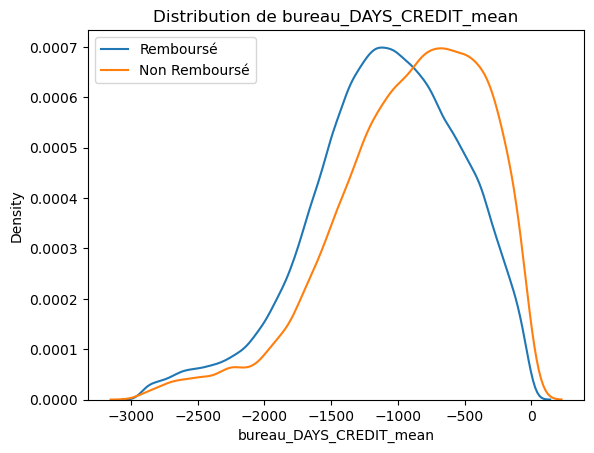

In [53]:
def kde_target(var_name, df):
    """
    - Calculates the correlation coefficient between the new variable and the target
    - Plots the distribution of the new variable for target == 0 and target == 1
    - Calculates median for repaid vs not repaid
    """
    # On commence par le coefficient de corrélation
    corr = df['TARGET'].corr(df[var_name])
    print('Le coefficient de corrélation entre la target et cette variable est', corr)
    
    # On calcule les médianes 
    med_repaid = round(df.loc[df['TARGET'] == 0, var_name].median(),3)
    med_not_repaid = round(df.loc[df['TARGET'] == 1, var_name].median(),3)
    print("Valeur médiane pour les prêts remboursés :", med_repaid)
    print("Valeur médiane pour les prêts non remboursés", med_not_repaid)
    
    # On trace le KDE plot
    sns.kdeplot(df.loc[df['TARGET'] == 0, var_name], label = 'Remboursé')
    sns.kdeplot(df.loc[df['TARGET'] == 1, var_name], label = 'Non Remboursé')
    
    # Légendes
    plt.xlabel(var_name)
    plt.ylabel('Density')
    plt.legend()
    plt.title("Distribution de %s" % var_name)
    plt.show()

kde_target(var_name = "bureau_DAYS_CREDIT_mean", df = app_train_with_bureau)

Le coefficient de corrélation entre la target et cette variable est 0.08903758347315553
Valeur médiane pour les prêts remboursés : -33.667
Valeur médiane pour les prêts non remboursés -27.0


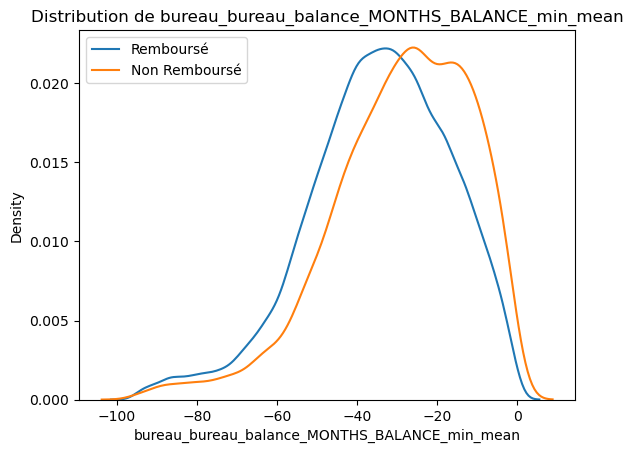

In [54]:
kde_target(var_name = "bureau_bureau_balance_MONTHS_BALANCE_min_mean", df = app_train_with_bureau)

## Autres dataframes

In [56]:
POS_CASH.drop(columns = ["SK_ID_CURR"], inplace = True)
credit_card.drop(columns = ["SK_ID_CURR"], inplace = True)
installments.drop(columns = ["SK_ID_CURR"], inplace = True)

In [57]:
def merge_previous_applications (df):
    """
    Just a practical function to merge 'installments', 'POS_CASH', 'credit_card', and 'previous_application' to 'df'
    
    Parameters
    ------
    df (dataframe):
        the df to merge on
        
    Return
    ------
    df_merged (dataframe):
        the same dataframe, with all the features from 'installments', 'POS_CASH', 'credit_card', and 'previous_application' added
    """
    
    # We will first merge everyone on previous_applications via SK_ID_PREV
    # Starting with POS_CASH
    POS_CASH_num = agg_numeric_features(POS_CASH, 'SK_ID_PREV', 'pos_cash')
    POS_CASH_cat = count_categorical(POS_CASH, 'SK_ID_PREV', 'pos_cash')
    
    # We merge both of them
    new_POS_CASH = POS_CASH_num.merge(POS_CASH_cat, on = "SK_ID_PREV")
    
    # We merge all of this with 'previous_applications'
    previous_applications_merged = previous_applications.merge(new_POS_CASH, how = 'left', on = 'SK_ID_PREV')
    
    # We do all of this again with the credit_card dataframe
    credit_card_num = agg_numeric_features(credit_card, 'SK_ID_PREV', 'credit_card')
    credit_card_cat = count_categorical(credit_card, 'SK_ID_PREV', 'credit_card')
    new_credit_card = credit_card_num.merge(credit_card_cat, on = "SK_ID_PREV")
    previous_applications_merged = previous_applications_merged.merge(new_credit_card, how = 'left', on = 'SK_ID_PREV')
    
    # Now we have an easier time with installments because no categorical features
    new_installments = agg_numeric_features(installments, 'SK_ID_PREV', 'installments')
    previous_applications_merged = previous_applications_merged.merge(new_installments, how = 'left', on = 'SK_ID_PREV')
    
    # We only need to proceed with previous_applications now, same way as "bureau" in the last function
    previous_applications_merged.drop(columns = ["SK_ID_PREV"], inplace = True)
    
    prev_apps_num = agg_numeric_features(previous_applications_merged, 'SK_ID_CURR', 'previous_application')
    prev_apps_cat = count_categorical(previous_applications_merged, 'SK_ID_CURR', 'previous_application')
    new_prev_apps = prev_apps_num.merge(prev_apps_cat, on = 'SK_ID_CURR')
    
    # Finally we can merge it all with 'df'
    merged_with_previous_apps = df.merge(new_prev_apps, how = 'left', on = 'SK_ID_CURR')
    
    return merged_with_previous_apps

app_train_complete = merge_previous_applications(app_train_with_bureau)

In [58]:
print("Avec tous les dataframes réunis, on obtient", app_train_complete.shape[1], "features au total")

Avec tous les dataframes réunis, on obtient 1771 features au total


In [59]:
app_train_complete.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,previous_application_PRODUCT_COMBINATION_POS industry without interest_count,previous_application_PRODUCT_COMBINATION_POS industry without interest_freq,previous_application_PRODUCT_COMBINATION_POS mobile with interest_count,previous_application_PRODUCT_COMBINATION_POS mobile with interest_freq,previous_application_PRODUCT_COMBINATION_POS mobile without interest_count,previous_application_PRODUCT_COMBINATION_POS mobile without interest_freq,previous_application_PRODUCT_COMBINATION_POS other with interest_count,previous_application_PRODUCT_COMBINATION_POS other with interest_freq,previous_application_PRODUCT_COMBINATION_POS others without interest_count,previous_application_PRODUCT_COMBINATION_POS others without interest_freq
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,1.0,0.0,0.0
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0.0,0.0,0.0,0.000000,1.0,1.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0.0,0.0,1.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0


## Feature engineering

In [60]:
app_train_complete["CREDIT_TERM"] = app_train_complete["AMT_CREDIT"] / app_train_complete["AMT_ANNUITY"]
app_train_complete["CREDIT_TERM"].describe()

count    307499.000000
mean         21.612322
std           7.823823
min           8.036674
25%          15.614496
50%          20.000000
75%          27.099985
max          45.305079
Name: CREDIT_TERM, dtype: float64

In [61]:
app_train_complete['ANNUITY_INCOME_PERCENT'] = app_train_complete['AMT_ANNUITY'] / app_train_complete['AMT_INCOME_TOTAL']
app_train_complete['ANNUITY_INCOME_PERCENT'].describe()

count    307499.000000
mean          0.180930
std           0.094574
min           0.000224
25%           0.114782
50%           0.162833
75%           0.229067
max           1.875965
Name: ANNUITY_INCOME_PERCENT, dtype: float64

In [62]:
app_train_complete.loc[app_train_complete['ANNUITY_INCOME_PERCENT'] >= 1,:]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,previous_application_PRODUCT_COMBINATION_POS mobile with interest_count,previous_application_PRODUCT_COMBINATION_POS mobile with interest_freq,previous_application_PRODUCT_COMBINATION_POS mobile without interest_count,previous_application_PRODUCT_COMBINATION_POS mobile without interest_freq,previous_application_PRODUCT_COMBINATION_POS other with interest_count,previous_application_PRODUCT_COMBINATION_POS other with interest_freq,previous_application_PRODUCT_COMBINATION_POS others without interest_count,previous_application_PRODUCT_COMBINATION_POS others without interest_freq,CREDIT_TERM,ANNUITY_INCOME_PERCENT
678,100784,1,0,0,1,0,54000.0,1885500.0,74191.5,1885500.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,25.413963,1.373917
20727,124157,1,0,1,1,0,25650.0,2173500.0,48118.5,2173500.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,45.169737,1.875965
25802,129999,0,0,0,1,0,46044.0,1024740.0,52452.0,900000.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,19.536719,1.139171
35791,141454,0,0,1,1,0,45000.0,2215224.0,58567.5,1980000.0,...,1.0,0.142857,0.0,0.000000,0.0,0.0,0.0,0.0,37.823434,1.301500
49185,156942,0,0,1,1,0,33750.0,835380.0,36927.0,675000.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,22.622471,1.094133
58379,167672,0,0,1,0,0,54000.0,1724688.0,60079.5,1575000.0,...,1.0,0.500000,0.0,0.000000,0.0,0.0,0.0,0.0,28.706764,1.112583
64338,174612,0,0,0,1,0,54000.0,1574532.0,64260.0,1350000.0,...,1.0,0.333333,0.0,0.000000,0.0,0.0,0.0,0.0,24.502521,1.190000
68803,179800,0,0,0,1,0,31500.0,755190.0,32125.5,675000.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,23.507494,1.019857
95599,210988,0,0,1,1,0,76500.0,2013840.0,82152.0,1800000.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,24.513585,1.073882
112431,230424,0,0,0,1,0,40500.0,472500.0,44635.5,454500.0,...,1.0,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,10.585745,1.102111


In [63]:
app_train_complete['THREE_TIMES_ANNUITY_AS_INCOME'] = (app_train_complete['ANNUITY_INCOME_PERCENT'] <= 1/3).astype(int)
app_train_complete['THREE_TIMES_ANNUITY_AS_INCOME'].describe()

count    307511.000000
mean          0.933391
std           0.249344
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: THREE_TIMES_ANNUITY_AS_INCOME, dtype: float64

In [64]:
app_train_complete['GLOBAL_INTEREST_RATE'] = (app_train_complete['AMT_CREDIT'] / app_train_complete['AMT_GOODS_PRICE'] - 1) * 100
app_train_complete['GLOBAL_INTEREST_RATE'].describe()

count    307233.000000
mean         12.299517
std          12.404500
min         -85.000000
25%           0.000000
50%          11.880000
75%          19.800000
max         500.000000
Name: GLOBAL_INTEREST_RATE, dtype: float64

In [65]:
app_train_complete.loc[app_train_complete['GLOBAL_INTEREST_RATE'] < 0, :]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,previous_application_PRODUCT_COMBINATION_POS mobile without interest_count,previous_application_PRODUCT_COMBINATION_POS mobile without interest_freq,previous_application_PRODUCT_COMBINATION_POS other with interest_count,previous_application_PRODUCT_COMBINATION_POS other with interest_freq,previous_application_PRODUCT_COMBINATION_POS others without interest_count,previous_application_PRODUCT_COMBINATION_POS others without interest_freq,CREDIT_TERM,ANNUITY_INCOME_PERCENT,THREE_TIMES_ANNUITY_AS_INCOME,GLOBAL_INTEREST_RATE
1942,102276,0,1,1,1,0,540000.0,315000.0,15750.0,450000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,20.0,0.029167,1,-30.000000
2138,102512,0,1,1,1,0,112500.0,135000.0,6750.0,202500.0,...,0.0,0.000000,0.0,0.00,0.0,0.0,20.0,0.060000,1,-33.333333
2808,103276,0,1,0,1,0,189000.0,337500.0,16875.0,540000.0,...,0.0,0.000000,0.0,0.00,0.0,0.0,20.0,0.089286,1,-37.500000
3769,104401,0,1,1,1,0,112500.0,135000.0,6750.0,382500.0,...,0.0,0.000000,0.0,0.00,0.0,0.0,20.0,0.060000,1,-64.705882
4179,104889,0,1,1,1,1,436500.0,450000.0,22500.0,900000.0,...,1.0,0.166667,0.0,0.00,0.0,0.0,20.0,0.051546,1,-50.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300919,448622,0,1,0,1,0,108000.0,157500.0,7875.0,180000.0,...,0.0,0.000000,0.0,0.00,0.0,0.0,20.0,0.072917,1,-12.500000
300971,448680,0,1,1,1,3,292500.0,675000.0,33750.0,855000.0,...,0.0,0.000000,0.0,0.00,0.0,0.0,20.0,0.115385,1,-21.052632
303227,451314,0,1,1,0,2,225000.0,225000.0,11250.0,405000.0,...,0.0,0.000000,1.0,0.25,0.0,0.0,20.0,0.050000,1,-44.444444
303870,452064,0,1,1,1,0,180000.0,225000.0,11250.0,315000.0,...,1.0,0.076923,0.0,0.00,0.0,0.0,20.0,0.062500,1,-28.571429


In [66]:
app_train_complete.loc[app_train_complete['GLOBAL_INTEREST_RATE'] > 100, :]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,previous_application_PRODUCT_COMBINATION_POS mobile without interest_count,previous_application_PRODUCT_COMBINATION_POS mobile without interest_freq,previous_application_PRODUCT_COMBINATION_POS other with interest_count,previous_application_PRODUCT_COMBINATION_POS other with interest_freq,previous_application_PRODUCT_COMBINATION_POS others without interest_count,previous_application_PRODUCT_COMBINATION_POS others without interest_freq,CREDIT_TERM,ANNUITY_INCOME_PERCENT,THREE_TIMES_ANNUITY_AS_INCOME,GLOBAL_INTEREST_RATE
12139,114154,0,1,0,1,0,168750.0,315000.0,15750.0,90000.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,20.0,0.093333,1,250.000000
34516,139994,0,1,0,1,1,67500.0,180000.0,9000.0,67500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,20.0,0.133333,1,166.666667
40074,146420,0,1,1,1,1,112500.0,270000.0,13500.0,90000.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,20.0,0.120000,1,200.000000
40302,146687,0,1,0,1,0,202500.0,270000.0,13500.0,45000.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,20.0,0.066667,1,500.000000
42864,149626,0,1,0,0,0,225000.0,337500.0,16875.0,112500.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,20.0,0.075000,1,200.000000
75080,187078,0,1,1,1,1,225000.0,630000.0,31500.0,135000.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,20.0,0.140000,1,366.666667
91613,206387,0,1,1,1,1,126000.0,202500.0,10125.0,90000.0,...,0.0,0.0,1.0,0.058824,0.0,0.0,20.0,0.080357,1,125.000000
93640,208738,0,1,0,0,3,225000.0,225000.0,11250.0,90000.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,20.0,0.050000,1,150.000000
114589,232879,0,1,0,1,0,135000.0,337500.0,16875.0,112500.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,20.0,0.125000,1,200.000000
136025,257776,0,1,1,1,0,180000.0,540000.0,27000.0,202500.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,20.0,0.150000,1,166.666667


In [67]:
app_train_complete["ANNUAL_INTEREST_RATE"] = (((1 + app_train_complete["GLOBAL_INTEREST_RATE"]/100) ** (1 / app_train_complete["CREDIT_TERM"])) - 1) * 100
app_train_complete["ANNUAL_INTEREST_RATE"].describe()

count    307227.000000
mean          0.563916
std           0.552914
min          -9.049611
25%           0.000000
50%           0.529560
75%           0.921547
max           9.372355
Name: ANNUAL_INTEREST_RATE, dtype: float64

In [68]:
def add_knowledge_features(df):
    """
    Adds some features to our dataframe (interest rates (global and annual), annuity/income rate, credit length)
    
    Parameters
    ------
    df (dataframe) :
        the df you want the features to be added on 
    
    Return
    ------
    The same dataframe, with 5 more features (as I wrote above)
    """
    # credit term
    df["CREDIT_TERM"] = df["AMT_CREDIT"] / df["AMT_ANNUITY"]
    
    # annuity/income rate
    df['ANNUITY_INCOME_PERCENT'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
    df['THREE_TIMES_ANNUITY_AS_INCOME'] = (df['ANNUITY_INCOME_PERCENT'] <= 1/3).astype(int)
    
    # interest rate (percentage)
    df['GLOBAL_INTEREST_RATE'] = (df['AMT_CREDIT'] / df['AMT_GOODS_PRICE'] - 1) * 100
    df["ANNUAL_INTEREST_RATE"] = (((1 + df["GLOBAL_INTEREST_RATE"]/100) ** (1 / df["CREDIT_TERM"])) - 1) * 100
    
    return df

In [69]:
def encode_all_categorical(df):
    """
    Encodes categorical features, using a LabelEncoder for features with 2 categories, and get_dummies for 3 or more categories
    
    Return
    ------
    the same df, with enconding done.
    """
    le = LabelEncoder()
    le_count = 0

    # Je parcours mes colonnes et je teste si 1. elles sont de type object et 2. elles ont 2 catégories
    for col in df:
        if df[col].dtype == "object":
            if len(list(df[col].unique())) <= 2:
                # Dans ce cas, j'utilise le LabelEncoder
                df[col] = le.fit_transform(df[col])
            
                le_count += 1

    print(le_count, "colonnes encodées avec LabelEncoder")
    
    # On encode les autres variables catégorielles avec un One-Hot Encoder
    df = pd.get_dummies(df)

    return df

app_train_complete = encode_all_categorical(app_train_complete)
app_train_complete.shape

0 colonnes encodées avec LabelEncoder


(307511, 1776)

# Alignement avec le jeu de test

In [70]:
app_test = merge_bureaus(app_test)
app_test_merged = merge_previous_applications(app_test)
app_test_merged = add_knowledge_features(app_test_merged)
app_test_complete = encode_all_categorical(app_test_merged)
app_test_complete.shape

4 colonnes encodées avec LabelEncoder


(48744, 1770)

In [71]:
train_labels = app_train_complete['TARGET']

# J'aligne
app_train_complete, app_test_complete = app_train_complete.align(app_test_complete, join = 'inner', axis = 1)

#Je récupère la target
app_train_complete['TARGET'] = train_labels

In [72]:
app_train_complete.shape

(307511, 1770)

In [73]:
app_test_complete.shape

(48744, 1769)

# Sélection finale

In [75]:
missing_values_table(app_train_complete)

This dataframe has 1770 columns. 
There are 1593 columns with missing values.


,Missing Values,% of Total Values
previous_application_RATE_INTEREST_PRIMARY_max,302902,98.5
previous_application_RATE_INTEREST_PRIVILEGED_max,302902,98.5
previous_application_RATE_INTEREST_PRIVILEGED_min,302902,98.5
previous_application_RATE_INTEREST_PRIMARY_mean,302902,98.5
previous_application_RATE_INTEREST_PRIVILEGED_mean,302902,98.5
...,...,...
ORGANIZATION_TYPE_Industry: type 1,0,0.0
ORGANIZATION_TYPE_Housing,0,0.0
ORGANIZATION_TYPE_Hotel,0,0.0
ORGANIZATION_TYPE_Government,0,0.0


In [76]:
train_missing = (app_train_complete.isnull().sum() / len(app_train_complete)).sort_values(ascending = False)
train_missing = list(train_missing.index[train_missing > 0.8])

print("On a", len(train_missing), "features présentant plus de 80% de valeurs manquantes")

On a 69 features présentant plus de 80% de valeurs manquantes


In [77]:
train = app_train_complete.drop(columns = train_missing)
train.shape

(307511, 1701)

In [78]:
corr_matrix = train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
upper.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,previous_application_PRODUCT_COMBINATION_POS other with interest_count,previous_application_PRODUCT_COMBINATION_POS other with interest_freq,previous_application_PRODUCT_COMBINATION_POS others without interest_count,previous_application_PRODUCT_COMBINATION_POS others without interest_freq,CREDIT_TERM,ANNUITY_INCOME_PERCENT,THREE_TIMES_ANNUITY_AS_INCOME,GLOBAL_INTEREST_RATE,ANNUAL_INTEREST_RATE,TARGET
SK_ID_CURR,NaN,0.001654,0.001216,0.000703,0.001129,0.001820,0.000343,0.000433,0.000232,0.000849,...,0.001284,0.000822,0.000838,0.001181,9.266672e-07,0.002351,0.002232,0.001060,0.000794,0.002108
NAME_CONTRACT_TYPE,NaN,NaN,0.004022,0.067177,0.029998,0.003531,0.221648,0.241544,0.185850,0.026867,...,0.013891,0.029848,0.013067,0.020082,6.743310e-02,0.251214,0.080304,0.322348,0.338091,0.030896
FLAG_OWN_CAR,NaN,NaN,NaN,0.002817,0.102023,0.083383,0.116225,0.141588,0.120310,0.041314,...,0.041520,0.030995,0.009156,0.009651,1.803238e-02,0.062275,0.034451,0.036488,0.034510,0.021851
FLAG_OWN_REALTY,NaN,NaN,NaN,NaN,0.002366,0.002934,0.039270,0.005225,0.045537,0.015175,...,0.009240,0.009432,0.004092,0.002597,7.447506e-02,0.020155,0.011161,0.029953,0.053049,0.006148
CNT_CHILDREN,NaN,NaN,NaN,NaN,NaN,0.012882,0.002145,0.021374,0.001827,0.025573,...,0.000235,0.005181,0.005340,0.006915,2.726683e-02,0.002296,0.004543,0.022612,0.035157,0.019187


In [79]:
threshold = 0.8

# Choix des colonnes qui dépassent le seuil de corrélation avec au moins une variable précédente
to_drop_8 = [column for column in upper.columns if any(upper[column] > threshold)]

print('Il y a %d colonnes à supprimer.' % (len(to_drop_8)))

train_8 = train.drop(columns = to_drop_8)
train_8.shape

Il y a 1035 colonnes à supprimer.


(307511, 666)

In [80]:
train_labels = train_8['TARGET']
train_8, test_8 = train_8.align(app_test_complete, join = 'inner', axis = 1)
train_8['TARGET'] = train_labels

test_8.shape

(48744, 665)

In [81]:
train_8.shape

(307511, 666)

In [82]:
train_8.to_csv("train_8.csv", index_label=False)
test_8.to_csv("test_8.csv", index_label=False)


    Le nombre de prêts précédemment contractés
    La date du dernier prêt contracté
    Le client a-t-il déjà un prêt en cours ? (Oui/Non)
    Le client a-t-il déjà été en défaut de paiement auparavant ? (Oui/Non)
    La durée du crédit (en mois ou en années)
    Le ratio "Revenu du client" / "Mensualités du prêt"
    (Facultatif) Le client a-t-il 3x le montant des mensualités en revenus (Oui/Non)
    Le ratio "Jours travaillés"/"Jours vécus", en partant des 18 ans
    Le taux d'intérêt global
